# Preprocessing and EDA on Youtube Comments Dataset

Importiamo il dataset da Kaggle

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atifaliak/youtube-comments-dataset")

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data preprocessing

In [9]:
file_path = path + '/YoutubeCommentsDataSet.csv'
df = pd.read_csv(file_path)
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [10]:
df.shape

(18408, 2)

We replace the strings expressing the sentiment with numbers:

positive -> 1

neutral -> 0

negative -> -1

In [11]:
# Replace strings with numbers
df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})
df.head()

/tmp/ipython-input-128098812.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'neutral': 0, 'negative': -1})


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,0
1,here in nz 50 of retailers don’t even have con...,-1
2,i will forever acknowledge this channel with t...,1
3,whenever i go to a place that doesn’t take app...,-1
4,apple pay is so convenient secure and easy to ...,1


In [12]:
# Print general DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 287.8+ KB


Now we check for NaNs.

In [13]:
df.isnull().sum()

,0
Comment,44
Sentiment,0


We can't work with a null comment, so we can delete all 44 of them from the dataframe.

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Comment,0
Sentiment,0


Now we look for duplicates in our dataframe and remove them.

In [15]:
df.duplicated().sum()

np.int64(490)

In [16]:
# Visualize duplicated rows
df[df.duplicated()]

,Comment,Sentiment
173,from all the stuff mentioned i have the dji mi...,1
518,happy independence day to ukraine and glory t...,-1
847,linus just turn the key lights 180 and bounce ...,1
848,dan continues to be my new favorite he has suc...,1
849,dan managing to set up his soldering station o...,1
...,...,...
18145,explore our free courses with completion certi...,0
18283,thanks for this video very neatly calmly expla...,1
18298,explore our free courses with completion certi...,0
18308,do you want to learn technology from me check ...,0


In [17]:
# Remove duplicates from the df
df.drop_duplicates(inplace=True)

In [18]:
# Verify
df.duplicated().sum()

np.int64(0)

Now we perform some basic string preprocessing on the comments.

In [19]:
# Remove empty comments if there are any
df[(df['Comment'].str.strip() == '')]

,Comment,Sentiment


In [20]:
# Make sure all comments are in lowercase
df['Comment'] = df['Comment'].str.lower()

In [21]:
# Make sure there are no trailing white spaces in the comments
df['Comment'] = df['Comment'].str.strip()

## EDA

First thing first, we want to visualize the distribution of the three classes.

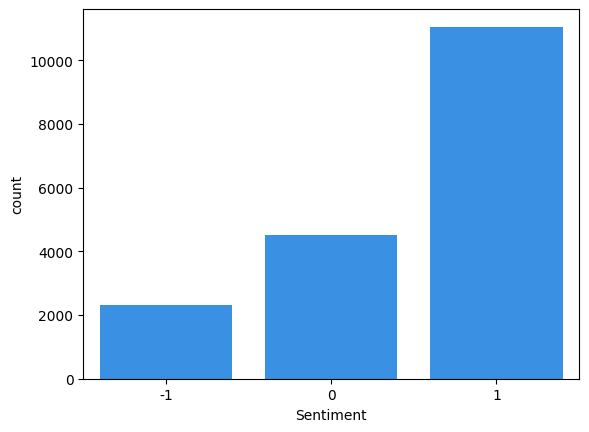

In [22]:
sns.countplot(data=df, x="Sentiment", color="dodgerblue")
plt.show()

We can see that we are working with quite an unbalanced dataset. It is no surprise, considering we are working with Youtube comments. Users typically decide to leave a comment if they feel good about the content they've seen.

In [23]:
# Frequency distribution of sentiments
df['Sentiment'].value_counts(normalize=True).mul(100).round(2)

,proportion
Sentiment,
1,61.84
0,25.19
-1,12.96


Let's look at the word count of each comment.

In [24]:
df['Word count'] = df['Comment'].apply(lambda x: len(x.split()))
df.sample(10)

,Comment,Sentiment,Word count
5928,rachel thanks for sharing such a stunning job ...,1,25
17713,hahaha great stuff i lost it when you coded co...,1,31
9815,wow you guys crispy pata looks so delicious gi...,1,32
16227,when they trailer gives you a better feeling t...,1,11
12474,one of the best thing about dude is that he ne...,1,45
12191,i did extremely well on the sat i went to a gr...,1,86
4476,this reminds me of nezhmetdinovs bishop pair a...,0,9
2915,such a nice nautral look love it,1,7
3931,i think btc 20990 tak ja sakti hai in 2 days,0,11
13049,you just said he would throw documents away an...,-1,48


In [25]:
df['Word count'].describe()

,Word count
count,17874.000000
mean,32.991664
std,45.526381
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,1353.000000


It looks like the average comment is about 33 words long, and there are only a few very long comments, with the longest comment being 1353 words long. Let's lool closely at the word count distribution.

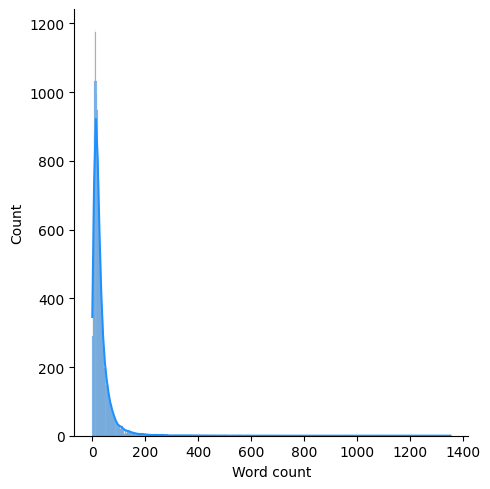

In [26]:
sns.displot(df['Word count'], kde=True, color="dodgerblue")
plt.show()

Now let's try to find if there is any correlation between sentiment and word count (e.g. negative comments are the longest ones).

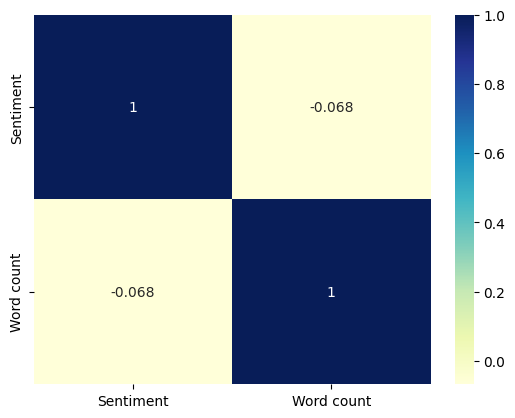

In [27]:
sns.heatmap(df.select_dtypes(np.number).corr(), cmap="YlGnBu", annot=True, linecolor="dodgerblue")
plt.show()

It looks like there isn't any correlation between the two. Let's compare boxplots for each sentiment category with its word count.

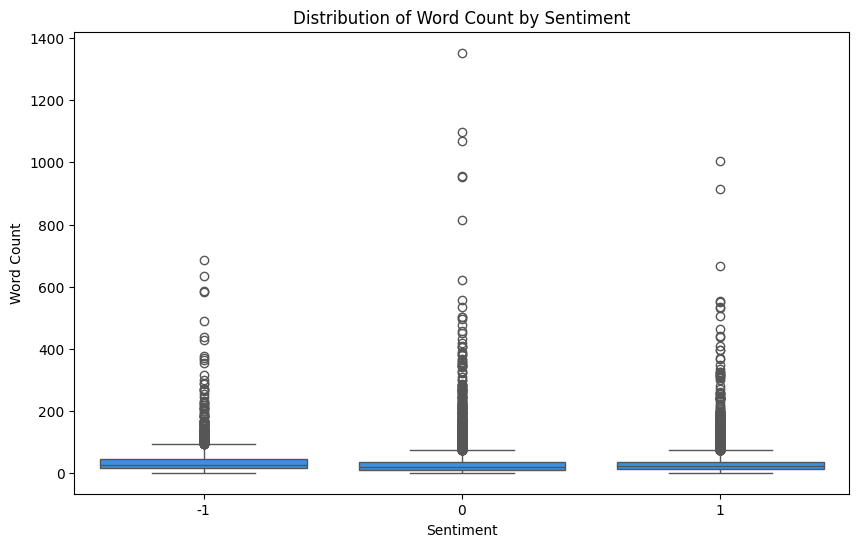

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sentiment", y="Word count", color="dodgerblue")
plt.title("Distribution of Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.show()

The only relevant difference between the three is that neutral comments have the most outliers with longer comments.

Next, we'll look at the number of characters in each comment.

In [29]:
df['Characters'] = df['Comment'].apply(len)
df.sample(10)

,Comment,Sentiment,Word count,Characters
6096,thank you so much,1,4,17
1187,oh boy cant wait to buy it in 2 years when the...,1,14,58
3032,i loved her and i love her even more now shes ...,1,36,193
8473,eu amo seus vídeos natie vejo eles 3000 vezes ...,1,21,112
8346,always love the gentle movements,1,5,32
1445,the question is did ty break the record for th...,0,13,70
17020,hello maam sir may i request to know course of...,0,34,173
6333,i cant wait to read the who is here after the ...,1,13,61
16109,i respect everyone who were involved in this s...,1,26,137
13373,how can jordan keep a straight face while talk...,1,17,90


In [30]:
df['Characters'].describe()

,Characters
count,17874.000000
mean,177.567976
std,252.165111
min,2.000000
25%,66.000000
50%,113.000000
75%,201.000000
max,7847.000000


The average comment is about 178 characters long, with the longest comment being 7847 characters long. Let's visualize the distribution.

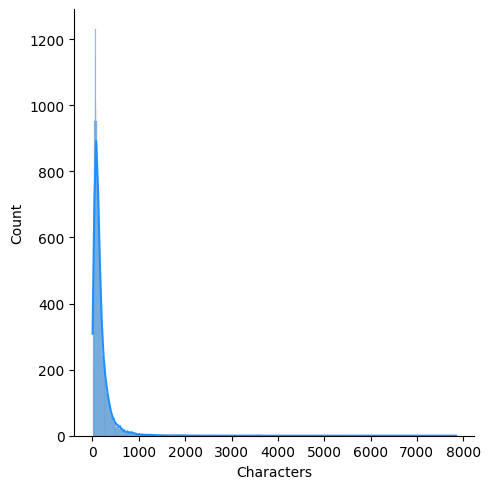

In [31]:
sns.displot(df['Characters'], kde=True, color="dodgerblue")
plt.show()

Obviously it's very similar to the distribution of Word count.

## Text exploration and processing with NLTK

We will remove the stopwords in our comments. Only a few comments are not in English, so we will use the list of English stopwords. We might lose a bit of information on those comments, or we will get 0 stopwords, but it is fine because it is just a small percentage of the comments.

In [32]:
from nltk.corpus import stopwords
import nltk

# Download stopwords
nltk.download('stopwords')

# We will use the list of English stopwords
stop_words = set(stopwords.words('english'))

# Let's look at the number of stopwords in each comment
df['Stopword count'] = df['Comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
df.sample(10)

,Comment,Sentiment,Word count,Characters,Stopword count
17513,love this series ill admit i was a little scep...,1,34,178,15
14592,absolutely wonderful,1,2,20,0
14289,thank you sabine so we’ll thought out and exec...,1,18,96,7
16574,ive been in the mood for chicken piccata for a...,1,22,112,14
4741,this playoff series and 2game match format is ...,1,11,68,3
1189,never thought id say this but i got my ps5 tod...,1,14,76,5
4209,dad i solved my cube in 3 seconds dad how long...,1,14,58,6
4428,tingman greetings from the inventor and founde...,1,30,164,13
3576,your channel has truly changed my life ive bee...,1,52,276,26
15327,apparently its because theyre cheaply made the...,-1,80,476,38


Let's look at the distribution of the stopwords.

<Figure size 1000x600 with 0 Axes>

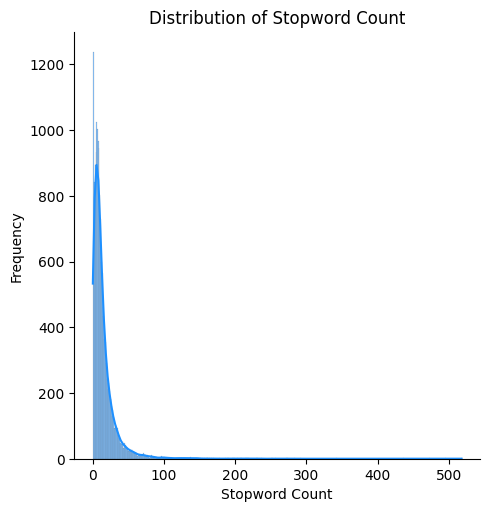

In [34]:
plt.figure(figsize=(10, 6))
sns.displot(df['Stopword count'], kde=True, color="dodgerblue")
plt.title("Distribution of Stopword Count")
plt.xlabel("Stopword Count")
plt.ylabel("Frequency")
plt.show()

There are usually very few stopwords, and that is most certainly because, as we've seen, most of the comments are quite short.

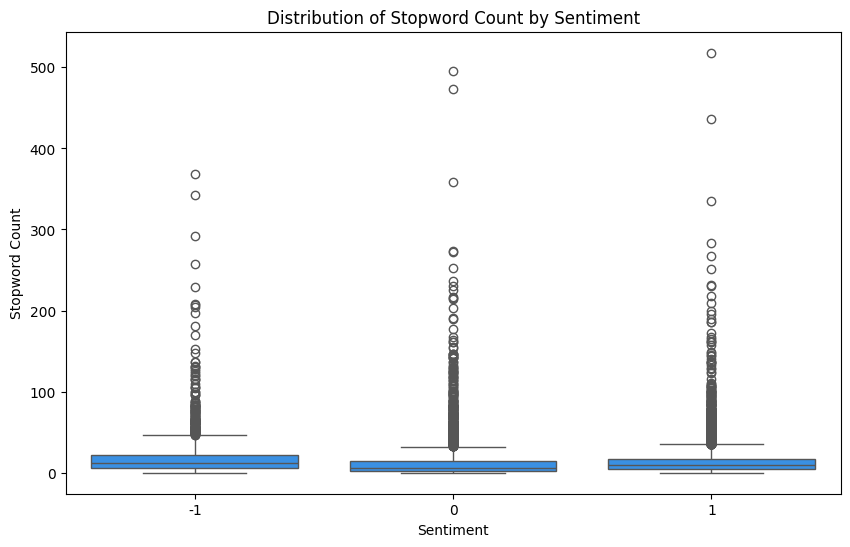

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sentiment", y="Stopword count", color="dodgerblue")
plt.title("Distribution of Stopword Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Stopword Count")
plt.show()

It looks like neutral comments have less stopwords than the others, while the negative comments have the most stopwords. However, the positive comments are the ones with the biggest outliers.

Now, using Counter, we want to see what the most frequent stopwords are.

In [36]:
from collections import Counter

# Extract all the stopwords from the comments
all_stopwords = [word for comment in df['Comment'] for word in comment.split() if word in stop_words]

# Let's look at the 10 most common stopwords
most_common = Counter(all_stopwords).most_common(10)
top_10 = pd.DataFrame(most_common, columns=['Stopword', 'Frequency'])

top_10

,Stopword,Frequency
0,the,22269
1,to,14707
2,and,14213
3,i,13292
4,a,12924
5,of,9428
6,you,8049
7,is,7890
8,in,7566
9,this,7065


/tmp/ipython-input-3591827389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x="Stopword", y="Frequency", palette="YlGnBu")


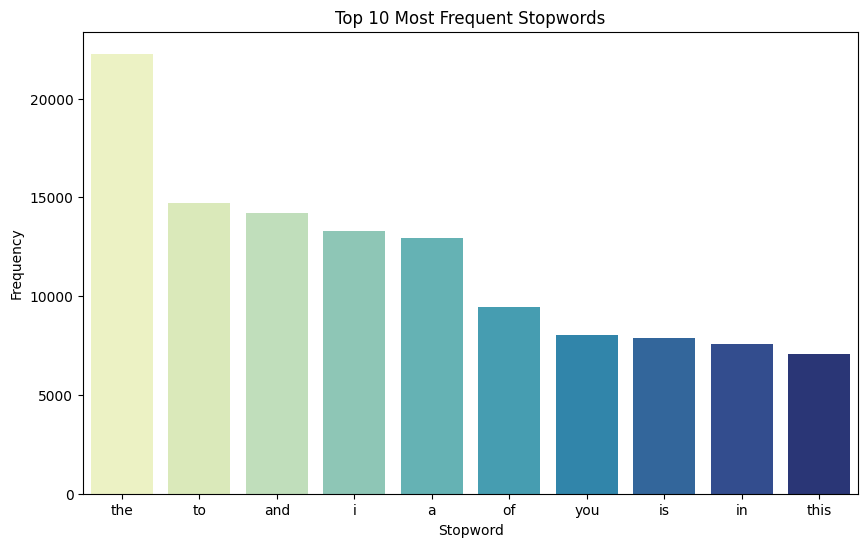

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x="Stopword", y="Frequency", palette="YlGnBu")
plt.title("Top 10 Most Frequent Stopwords")
plt.xlabel("Stopword")
plt.ylabel("Frequency")
plt.show()

Now we want to see what the most common characters are.

In [38]:
# We join all comments into one large string
all_text = ' '.join(df['Comment'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['Character', 'Frequency']).sort_values('Frequency', ascending=False)

Let's look at the less frequent character, which are probably special characters.

In [39]:
char_frequency_df.tail(50)

,Character,Frequency
191,ණ,1
190,ඇ,1
182,භ,1
177,ූ,1
1834,观,1
1833,发,1
1832,独,1
1831,保,1
1830,仍,1
1829,环,1


Let's analyze the punctuation characters in each comment.

In [40]:
import string

df['Punctuation chars'] = df['Comment'].apply(lambda x: sum([1 for char in x if char in string.punctuation]))

df.sample(10)

,Comment,Sentiment,Word count,Characters,Stopword count,Punctuation chars
12918,i love how jimmy said hydrolic with the letter...,1,20,95,10,0
16313,love the part where she says its hulkin time t...,1,17,79,8,0
15011,never say ill do it later when it comes to ass...,0,19,98,8,0
15591,great job steve we all need easy fixes hahahah...,1,14,73,3,0
926,the one that annoyed me was the borderlands 1 ...,-1,42,224,25,0
4060,omg wow,1,2,8,0,0
14838,the first ted talk ive seen in years that was ...,1,44,238,22,0
3538,great video guy love how you are diversifying ...,1,90,511,41,0
753,dz dobol b,0,3,10,0,0
15217,a lot of folks were hoping for an apartment th...,1,34,176,16,0


In [41]:
df['Punctuation chars'].describe()

,Punctuation chars
count,17874.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


As we are working with Youtube comments, we would expect to see that most comments don't contain any punctuation characters. However, apprarently punctuation is completely absent from these comments.

We will now use CountVectorizer to vectorize our comments and we will look at the most common bigrams.

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text, n=2, stop=10):
  vec = CountVectorizer(ngram_range=(n,n), stop_words='english').fit(text)
  bow = vec.transform(text)
  ngram_freq = bow.sum(axis=0).A1 # get dense array
  ngram_vocab = vec.get_feature_names_out()
  ngram_freq = list(zip(ngram_vocab, ngram_freq))
  ngram_freq.sort(key=lambda x: x[1], reverse=True)
  return ngram_freq[:stop]

top25_bigrams = get_top_ngrams(df['Comment'], 2, 25)
top25_bigrams_df = pd.DataFrame(top25_bigrams, columns=['Bigram', 'Frequency'])

top25_bigrams_df

,Bigram,Frequency
0,data science,245
1,machine learning,177
2,feel like,167
3,great video,150
4,computer science,133
5,years ago,110
6,data scientist,103
7,dont know,101
8,really good,97
9,ive seen,96


Surprisingly, the most frequent bigrams are "data science" and "machine learning". We can also see that a lot of bigrams are positive expressions like "good work", "great job", etc.. It makes sense, considering how unbalanced our dataset is towards positive comments.

Let's look at trigrams next.

In [43]:
top25_trigrams = get_top_ngrams(df['Comment'], 3, 25)
top25_trigrams_df = pd.DataFrame(top25_trigrams, columns=['Trigram', 'Frequency'])

top25_trigrams_df

,Trigram,Frequency
0,los mejores conciertos,82
1,son unos los,69
2,unos los mejores,68
3,appreciate manage smile,38
4,faces feel negative,38
5,just appreciate manage,38
6,let just appreciate,38
7,manage smile faces,38
8,smile faces feel,38
9,1112 sun hotter,33


We can see that the most frequent trigram is not actually that frequent: the most frequent bigram appears 245 times, while this one "only" appears 82 times.

We will now start the processing phase by removing the stopwords. We can't use the previously define "stop_words" because it excludes important words for sentiment analysis, such as "not", "but", etc.

In [44]:
to_keep = {'not', 'but', 'however', 'no', 'yet', 'very', 'extremely', 'never', 'always', 'quite'}

stop_words = set(stopwords.words('english')) - to_keep

df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df.head(10)

,Comment,Sentiment,Word count,Characters,Stopword count,Punctuation chars
0,lets not forget apple pay 2014 required brand ...,0,57,317,23,0
1,nz 50 retailers don’t even contactless credit ...,-1,29,163,10,0
2,forever acknowledge channel help lessons ideas...,1,31,183,16,0
3,whenever go place doesn’t take apple pay doesn...,-1,83,450,34,0
4,apple pay convenient secure easy use used kore...,1,26,135,12,0
5,we’ve hounding bank adopt apple pay understand...,0,32,155,18,0
6,got apple pay south africa 20202021 it’s widel...,1,14,74,5,0
7,need apple pay physical credit card,0,12,58,6,0
8,united states abundance retailers accept apple...,1,40,209,21,0
9,cambodia universal qr code system scan send mo...,0,42,227,17,0


We now apply the lemmatizer.

In [45]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['Comment'] = df['Comment'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Comment,Sentiment,Word count,Characters,Stopword count,Punctuation chars
0,let not forget apple pay 2014 required brand n...,0,57,317,23,0
1,nz 50 retailer don’t even contactless credit c...,-1,29,163,10,0
2,forever acknowledge channel help lesson idea e...,1,31,183,16,0
3,whenever go place doesn’t take apple pay doesn...,-1,83,450,34,0
4,apple pay convenient secure easy use used kore...,1,26,135,12,0
5,we’ve hounding bank adopt apple pay understand...,0,32,155,18,0
6,got apple pay south africa 20202021 it’s widel...,1,14,74,5,0
7,need apple pay physical credit card,0,12,58,6,0
8,united state abundance retailer accept apple p...,1,40,209,21,0
9,cambodia universal qr code system scan send mo...,0,42,227,17,0


Now we can visualize the most frequent words.

/tmp/ipython-input-3138988659.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette="YlGnBu")


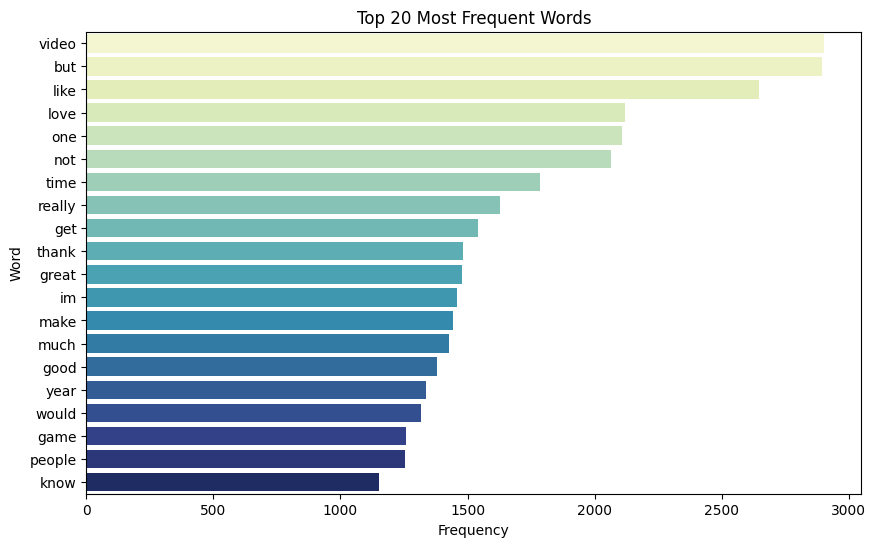

In [46]:
def plot_top_n_words(df, n=10):
  words = ' '.join(df['Comment']).split()

  counter = Counter(words)
  most_common = counter.most_common(n)

  words, counts = zip(*most_common)

  plt.figure(figsize=(10, 6))
  sns.barplot(x=counts, y=words, palette="YlGnBu")
  plt.title(f"Top {n} Most Frequent Words")
  plt.xlabel("Frequency")
  plt.ylabel("Word")
  plt.show()

plot_top_n_words(df, 20)

Unsurprisingly, the most common word is "video", followed by some of the stopwords we decided to keep and words like "like", "love", etc.

Let's download the clean version of the dataset.

In [48]:
df[['Comment', 'Sentiment']].to_csv('preprocessed_youtube_dataset.csv', index=False)